## Density Chart with Multiple Groups


A **multi density** chart allows to compare the distribution of several groups. Unfortunatelly, this type of charts tend to get **cluttered**: groups overlap each other and the figure gets unreadable. An easy workaround is to use **transparency**. However, it won’t solve the issue completely and it is often better to consider other options suggested further in this post.


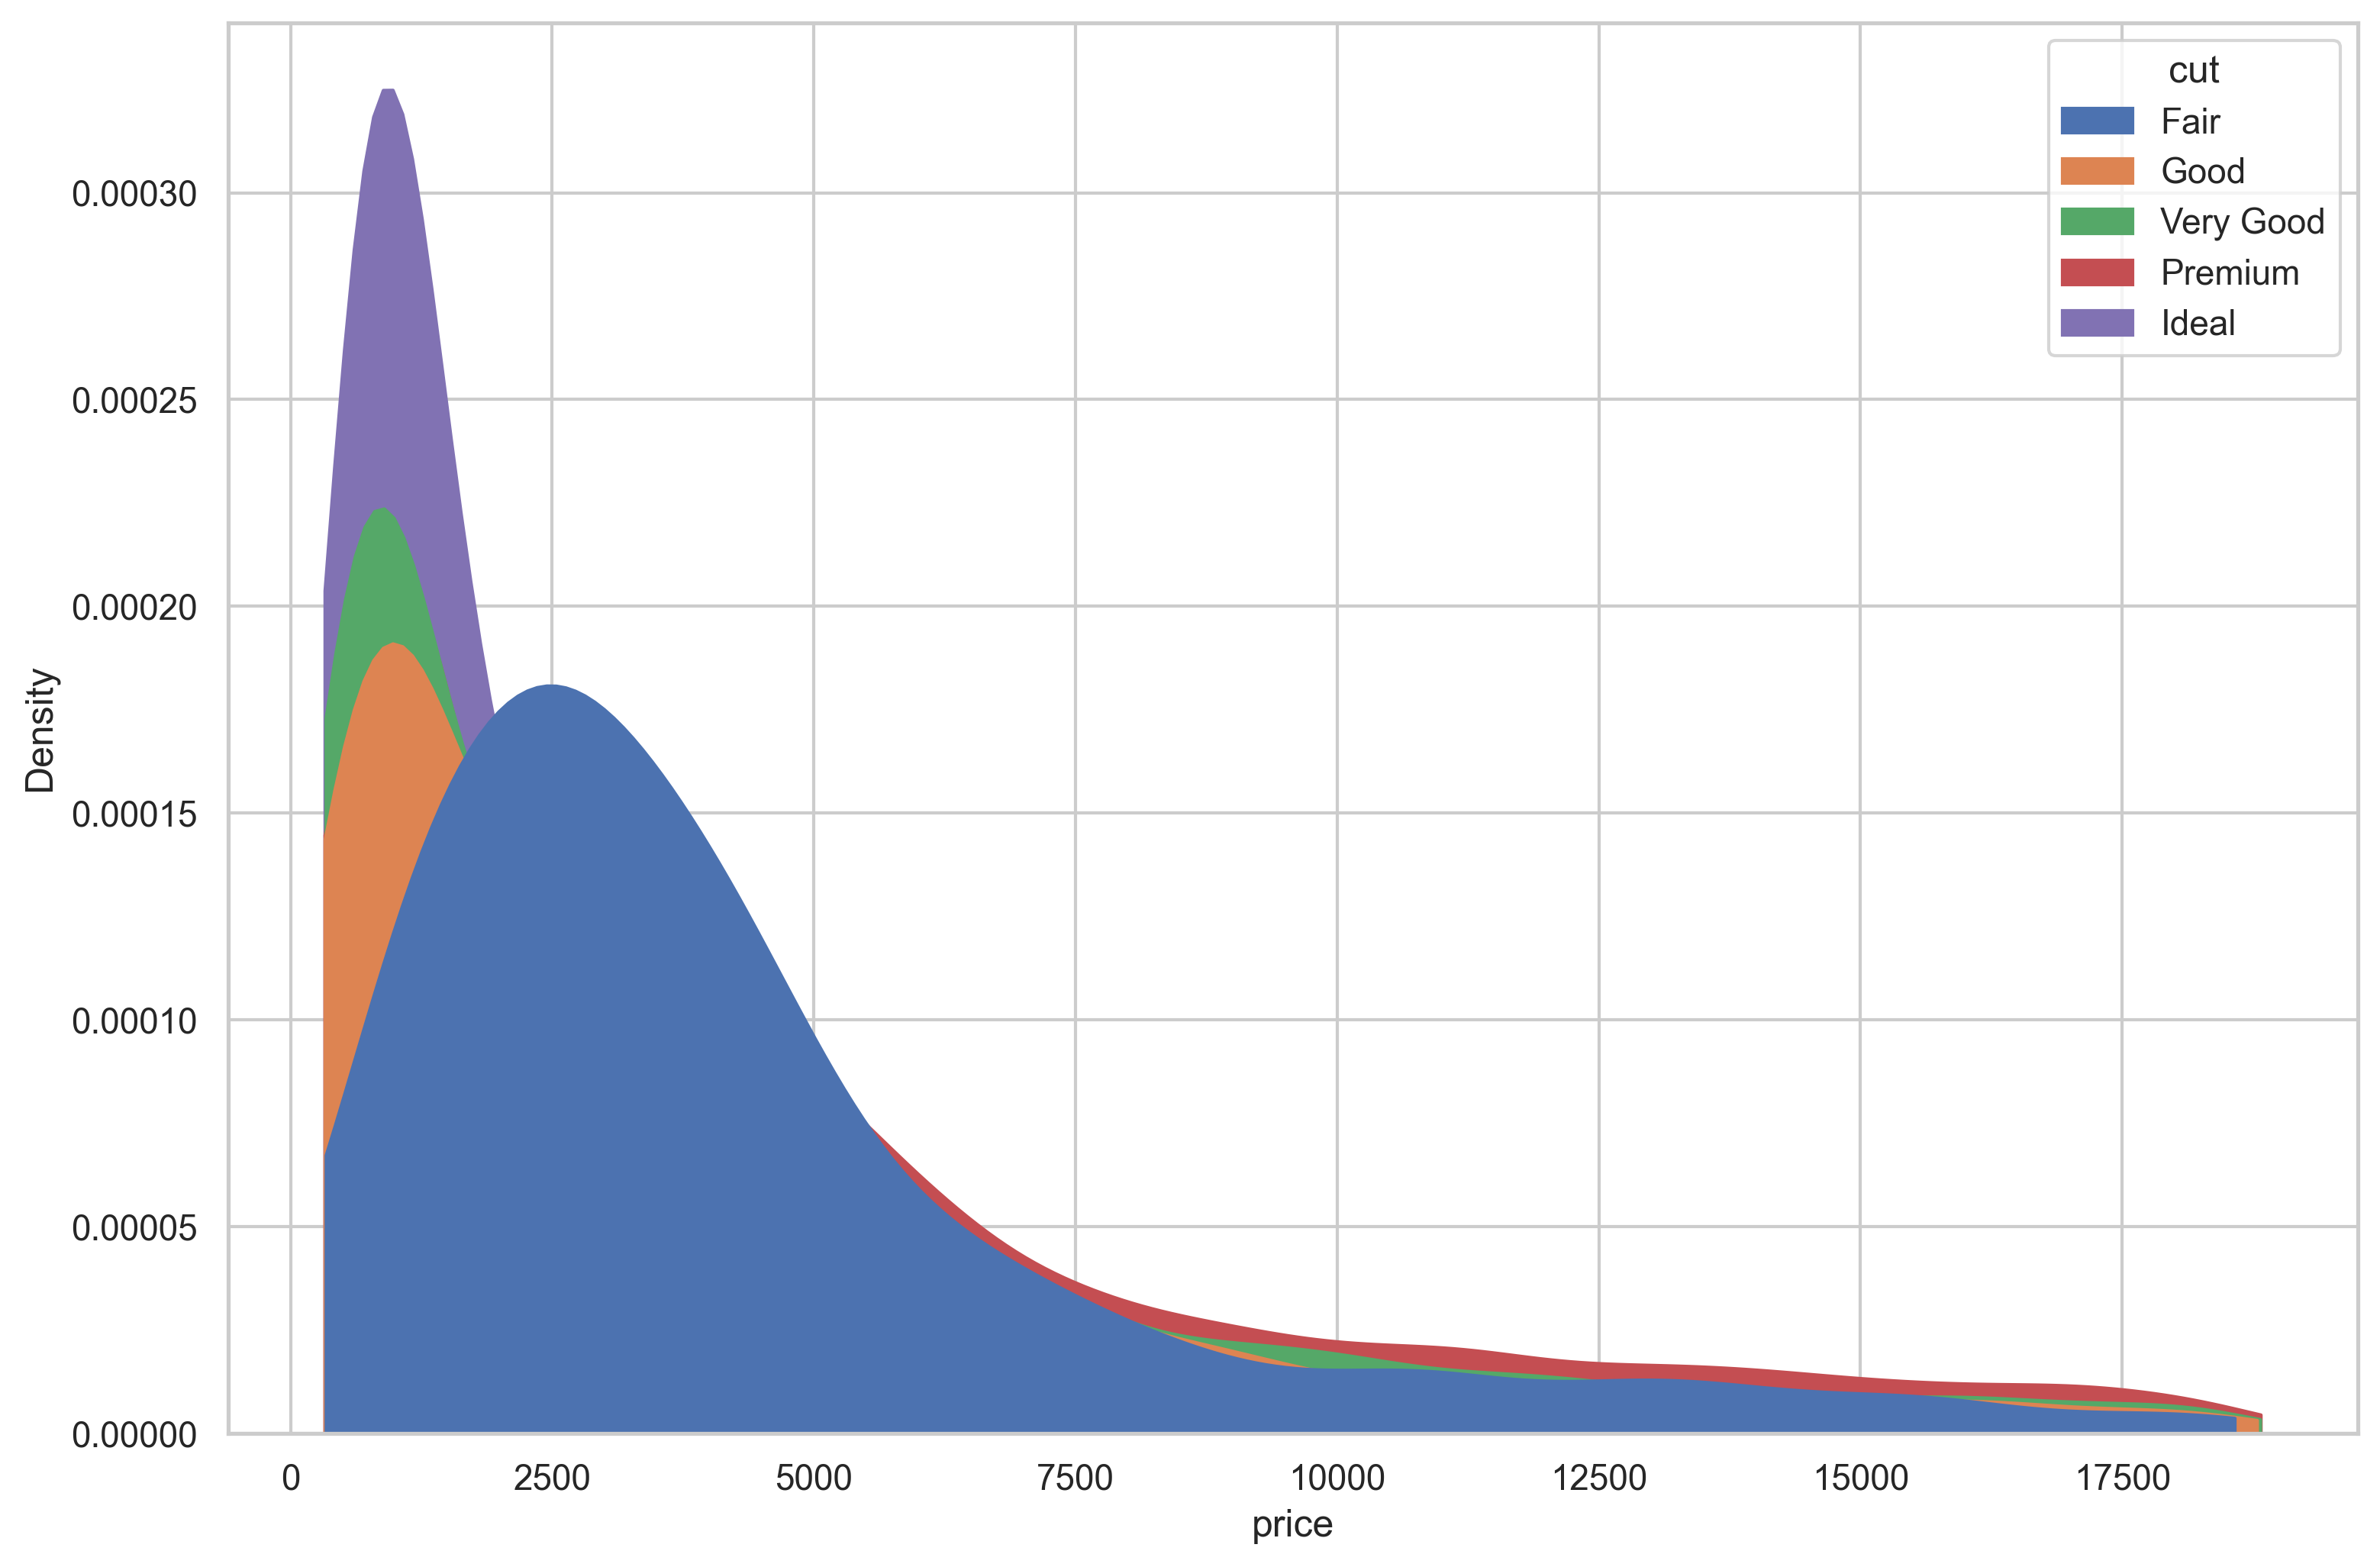

In [7]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import diamonds # dataset

# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set_theme(style="whitegrid")

# Without transparency
sns.kdeplot(data=diamonds, x="price", hue="cut", cut=0, fill=True, common_norm=False, alpha=1)
plt.show()

Note you can easily produce pretty much the same figure with some more transparency in order to see all groups


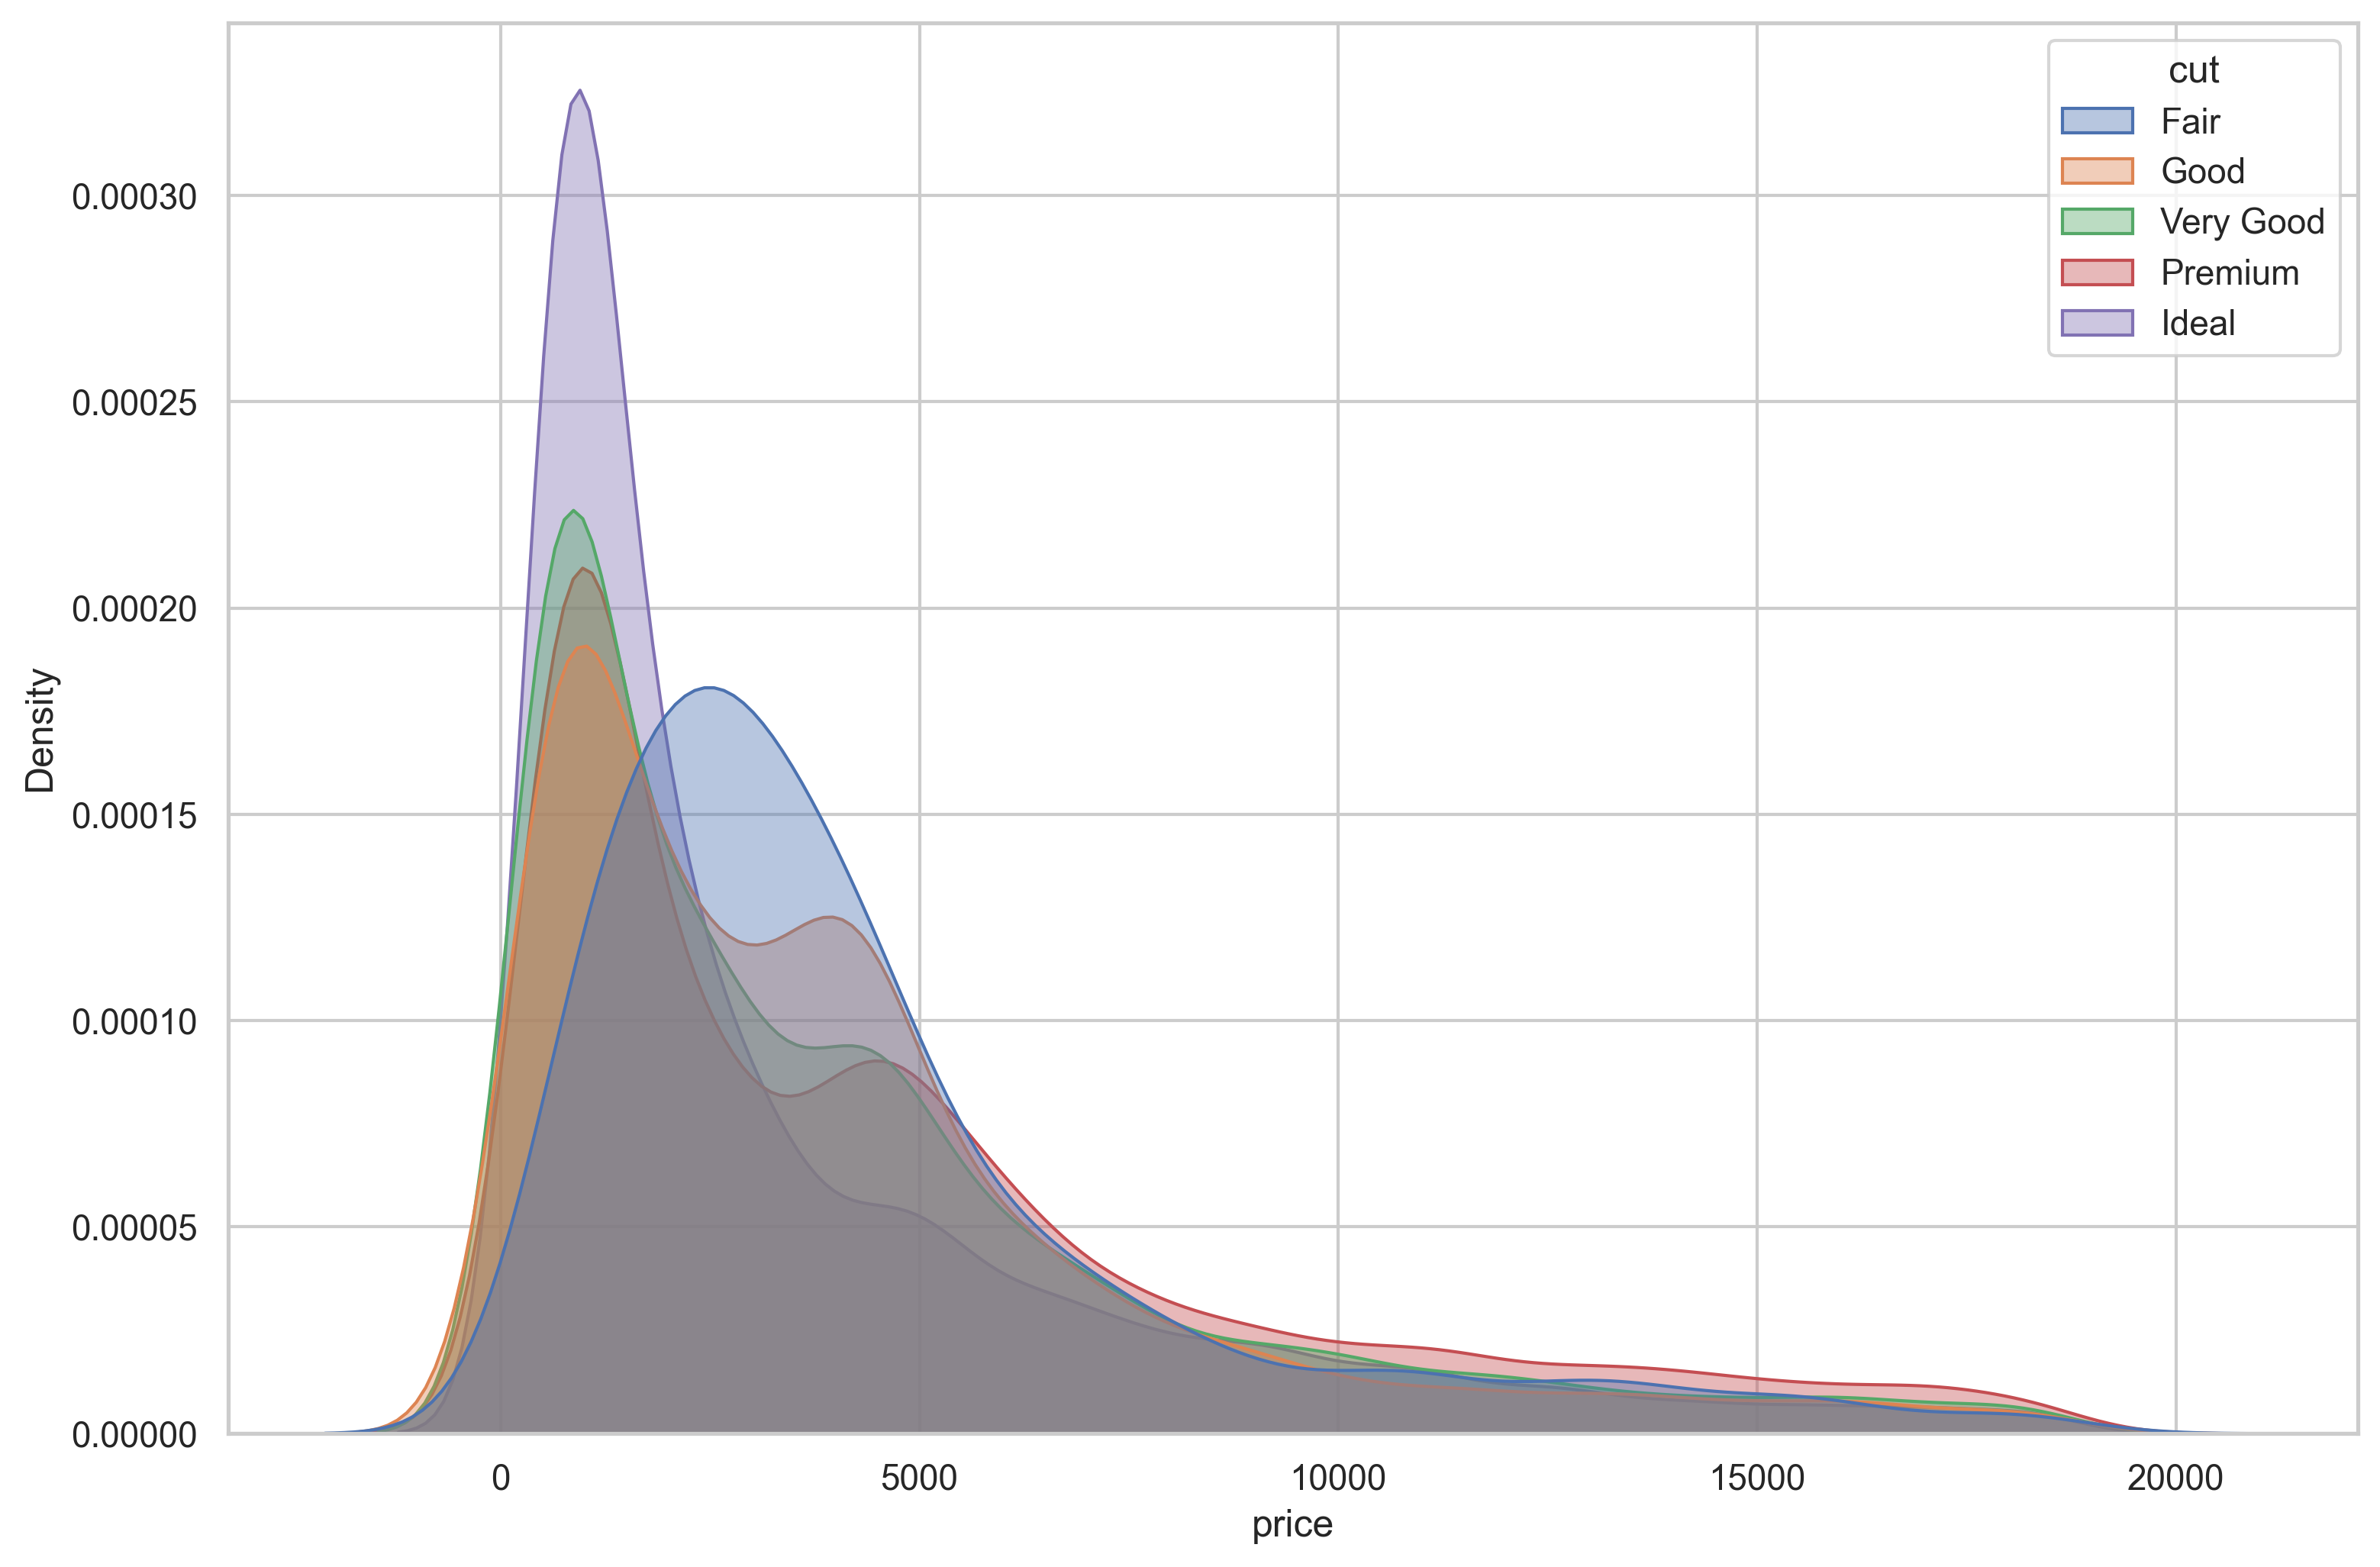

In [8]:
# With transparency
sns.kdeplot(data=diamonds, x="price", hue="cut", fill=True, common_norm=False, alpha=0.4)
plt.show()

Here is an example with [another dataset](https://www.data-to-viz.com/story/OneNumOneCatSeveralObs.html) where it works much better. In this dataset, groups have very distinct distribution, and it is easy to spot them even if on the same chart. Note that it is recommended to add group name next to their distribution instead of having a legend beside the chart.


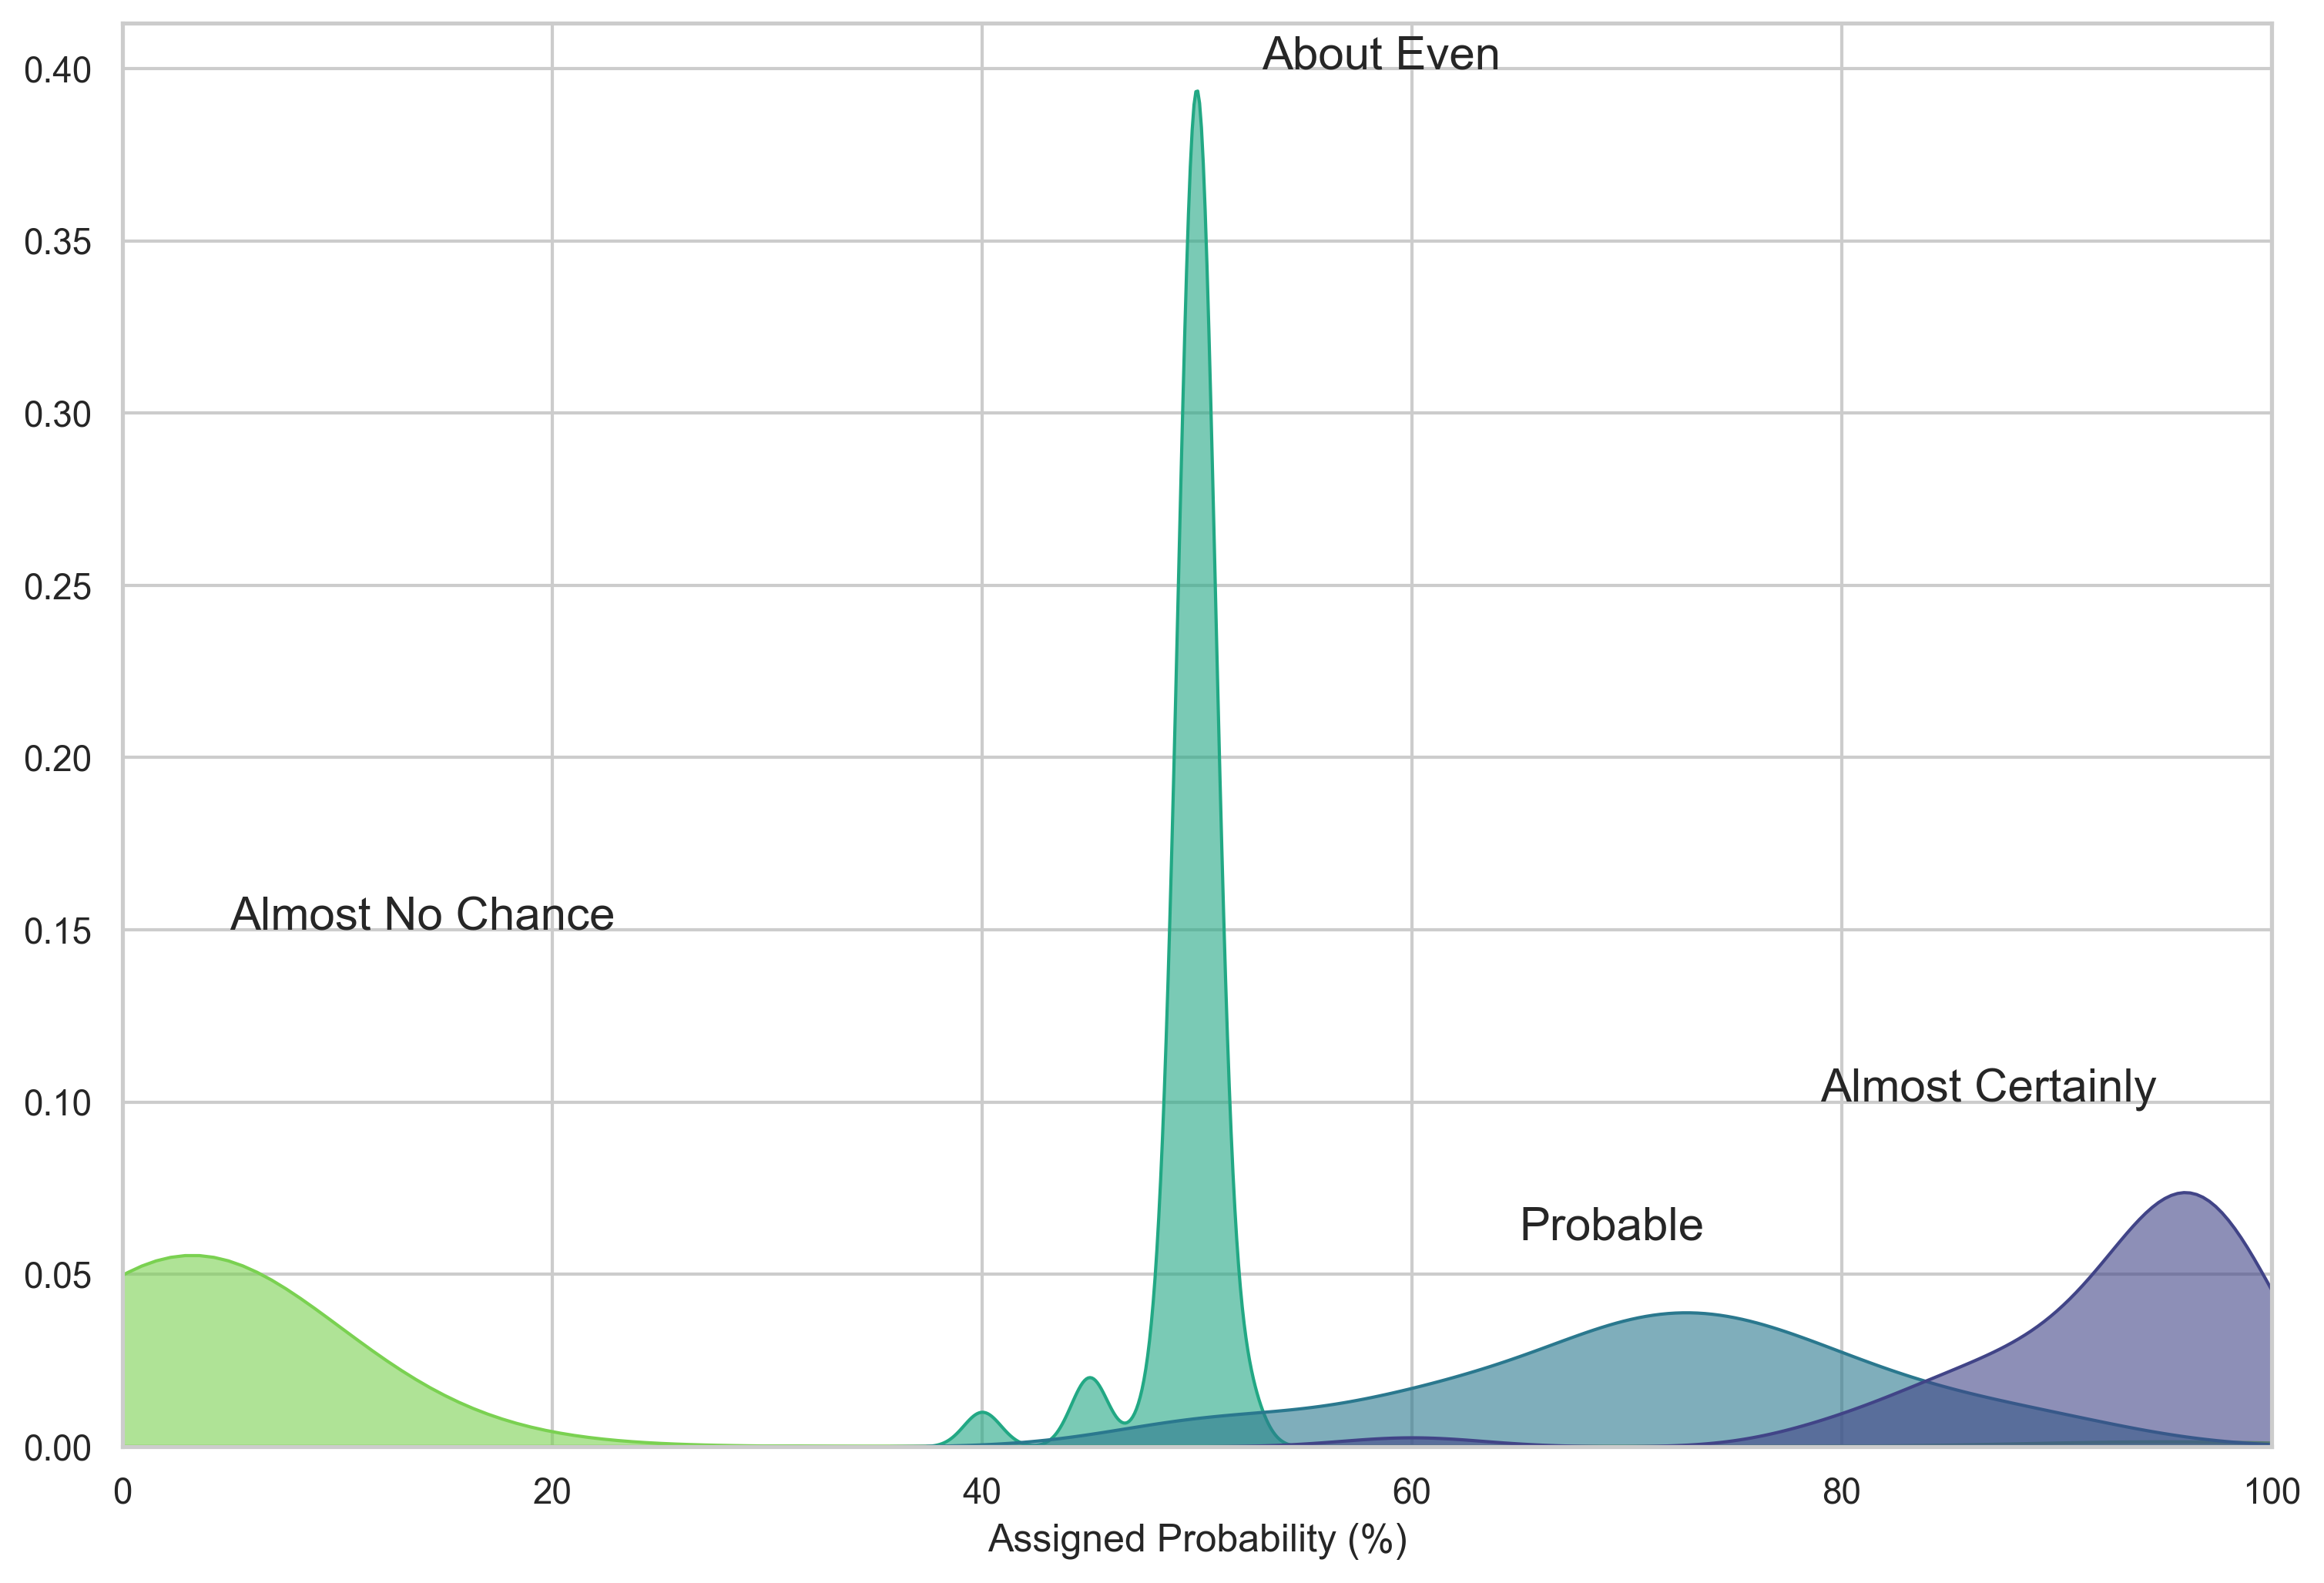

In [9]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# set seaborn whitegrid theme
sns.set_theme(style="whitegrid")

# load dataset from github and convert it to a long format
data = pd.read_csv("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv")
data = pd.melt(data, var_name='text', value_name='value')

# take only "Almost No Chance", "About Even", "Probable", "Almost Certainly"
data = data.loc[data.text.isin(["Almost No Chance","About Even","Probable","Almost Certainly"])]

# density plot
p = sns.kdeplot(data=data, x="value", hue="text", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
# control x limit
plt.xlim(0, 100)

# dataframe for annotations
annot = pd.DataFrame({
'x': [5, 53, 65, 79],
'y': [0.15, 0.4, 0.06, 0.1],
'text': ["Almost No Chance", "About Even", "Probable", "Almost Certainly"]
})

# add annotations one by one with a loop
for point in range(0,len(annot)):
     p.text(annot.x[point], annot.y[point], annot.text[point], horizontalalignment='left', size='large')

# add axis names        
plt.xlabel("Assigned Probability (%)")
plt.ylabel("")
        
# show the graph
plt.show()

## Small Multiples


By using small multiple, it gets easy to read the distribution of each group. It is still possible to compare groups since they share the same X axis boundaries. The **faceting** is made using the awesome `FacetGrid()` utility of [seaborn](http://python-graph-gallery.com/seaborn/).


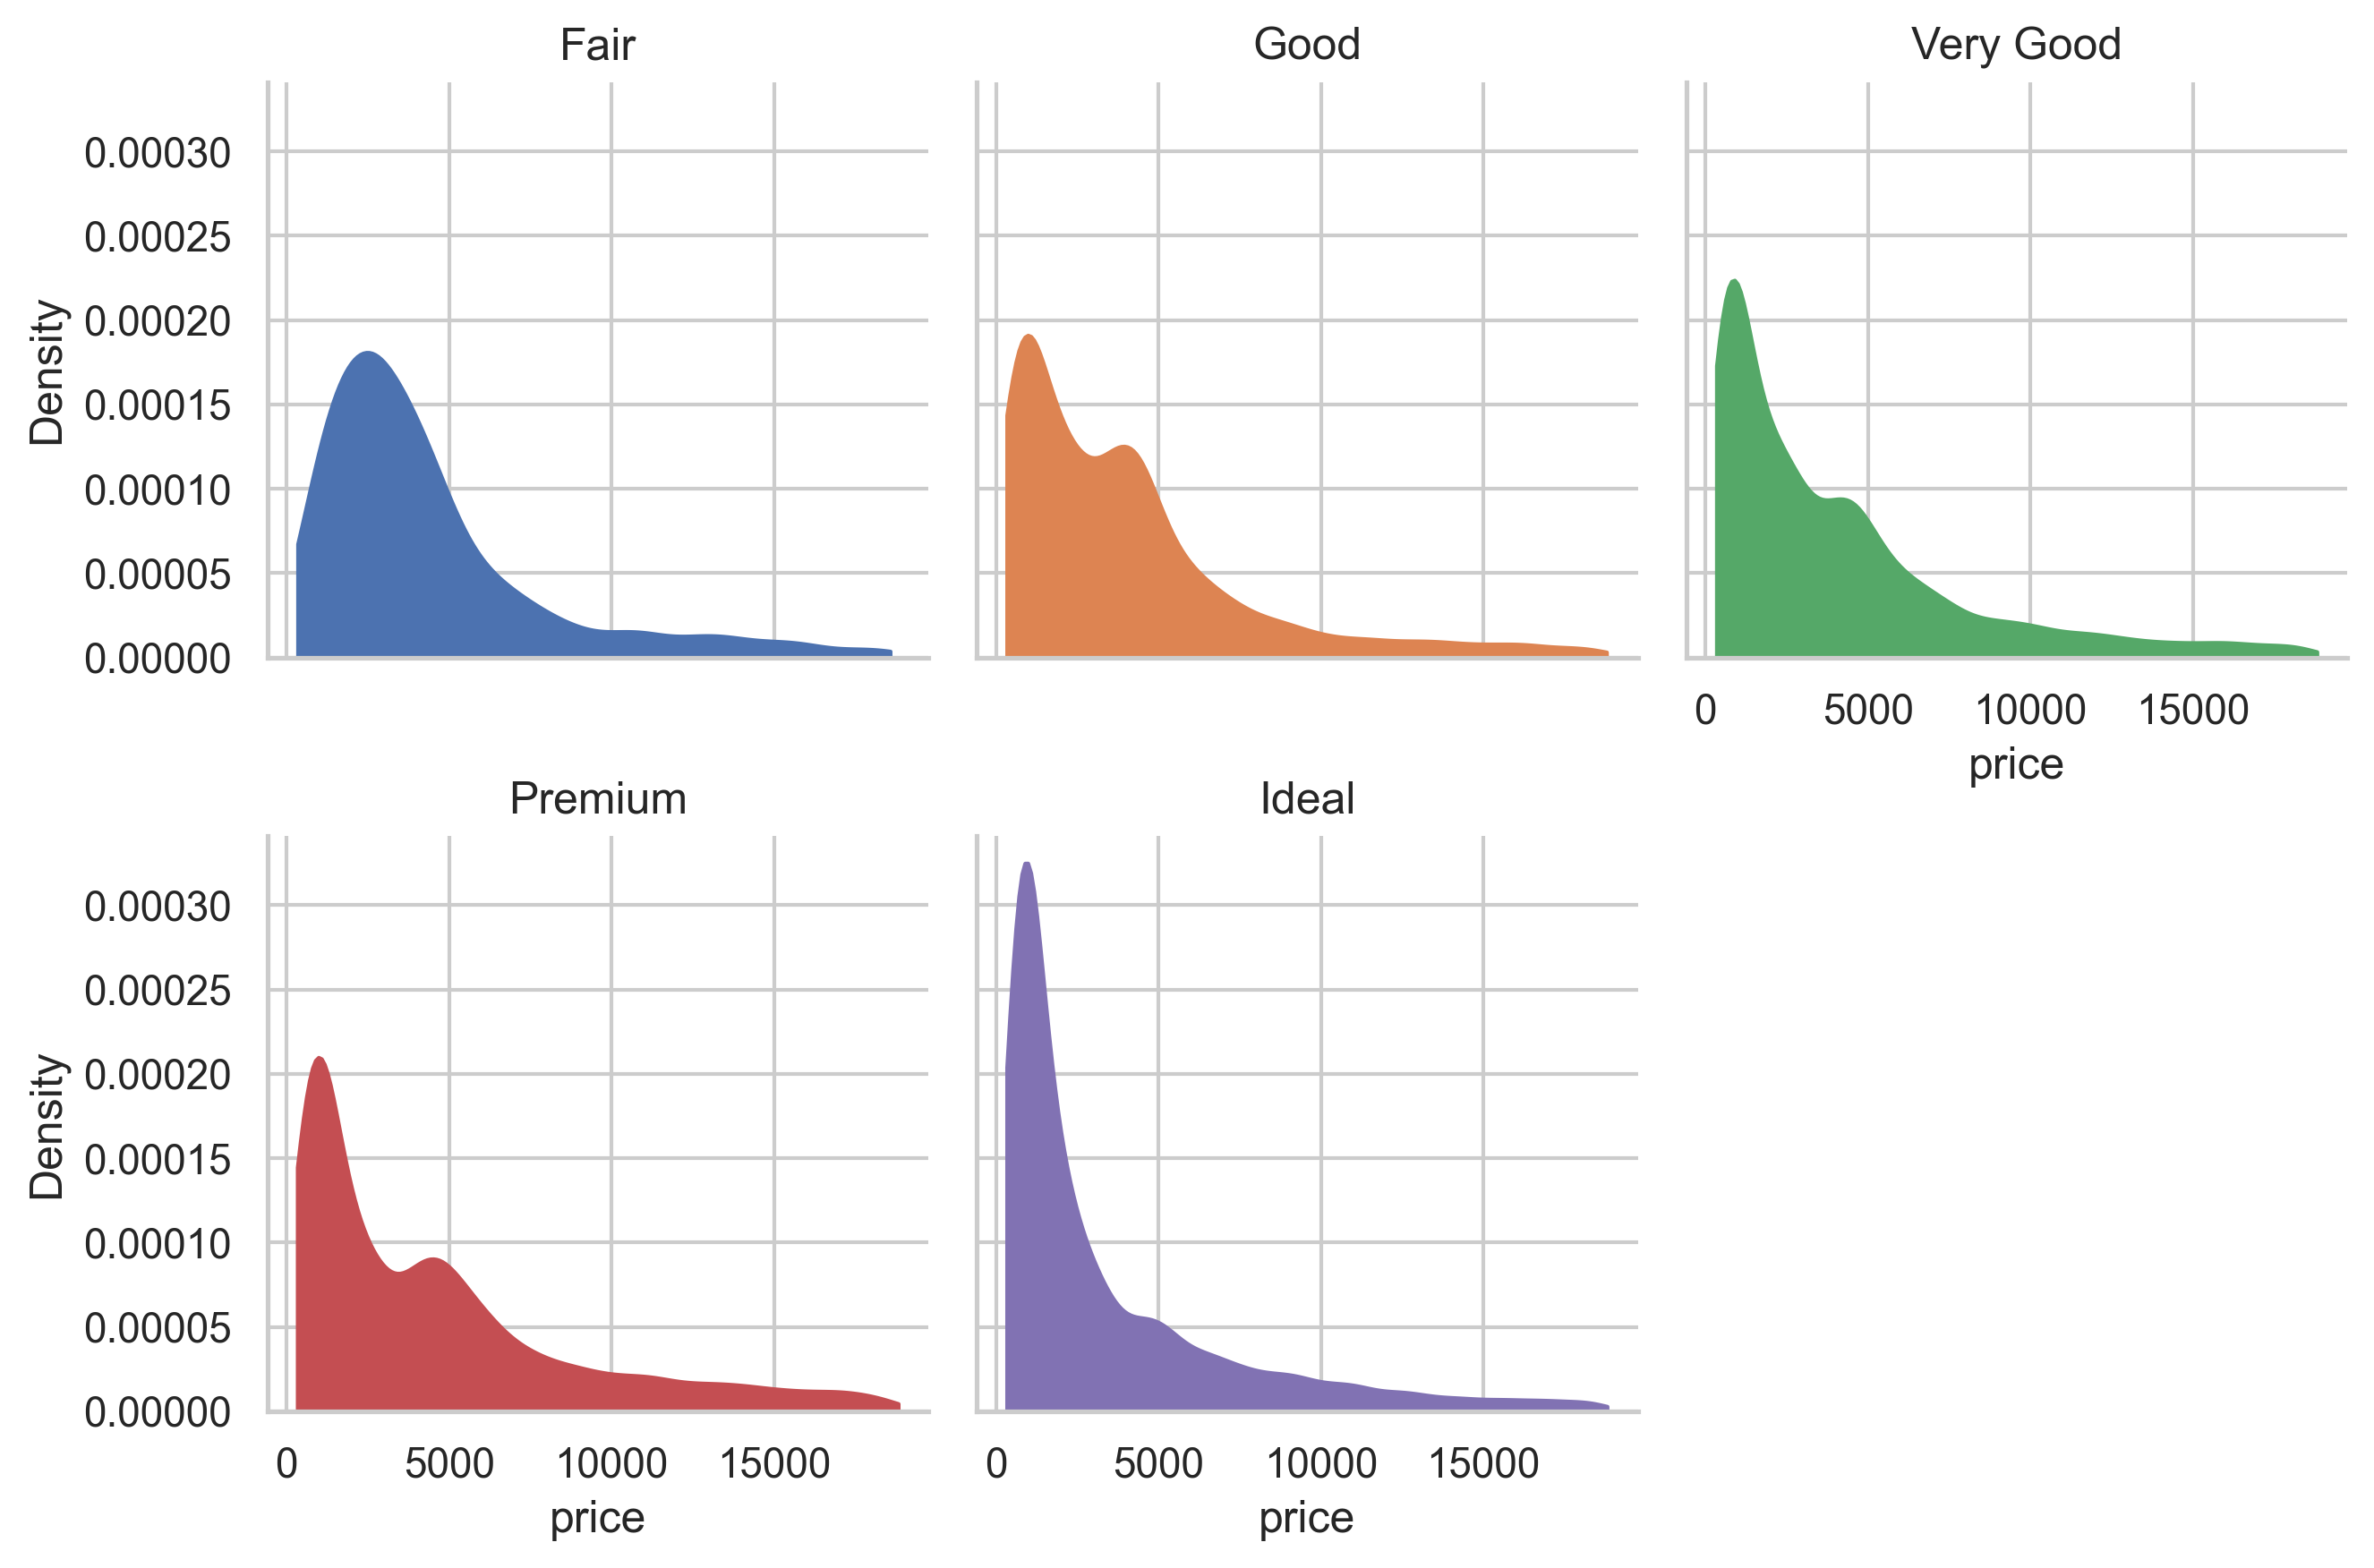

In [10]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import diamonds  # dataset

# set seaborn whitegrid theme
sns.set_theme(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(diamonds, col='cut', hue='cut', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,"price", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

## Stacked Density Chart


Another solution is to **stack** the groups by passing "fill" to the `multiple` argument of the function. This allows to see which group is the most frequent for a given value, but it makes hard to understand the distribution of a group that is not on the bottom of the chart.

You can visit [data to viz](https://www.data-to-viz.com/caveat/stacking.html) for a complete explanation on this matter.


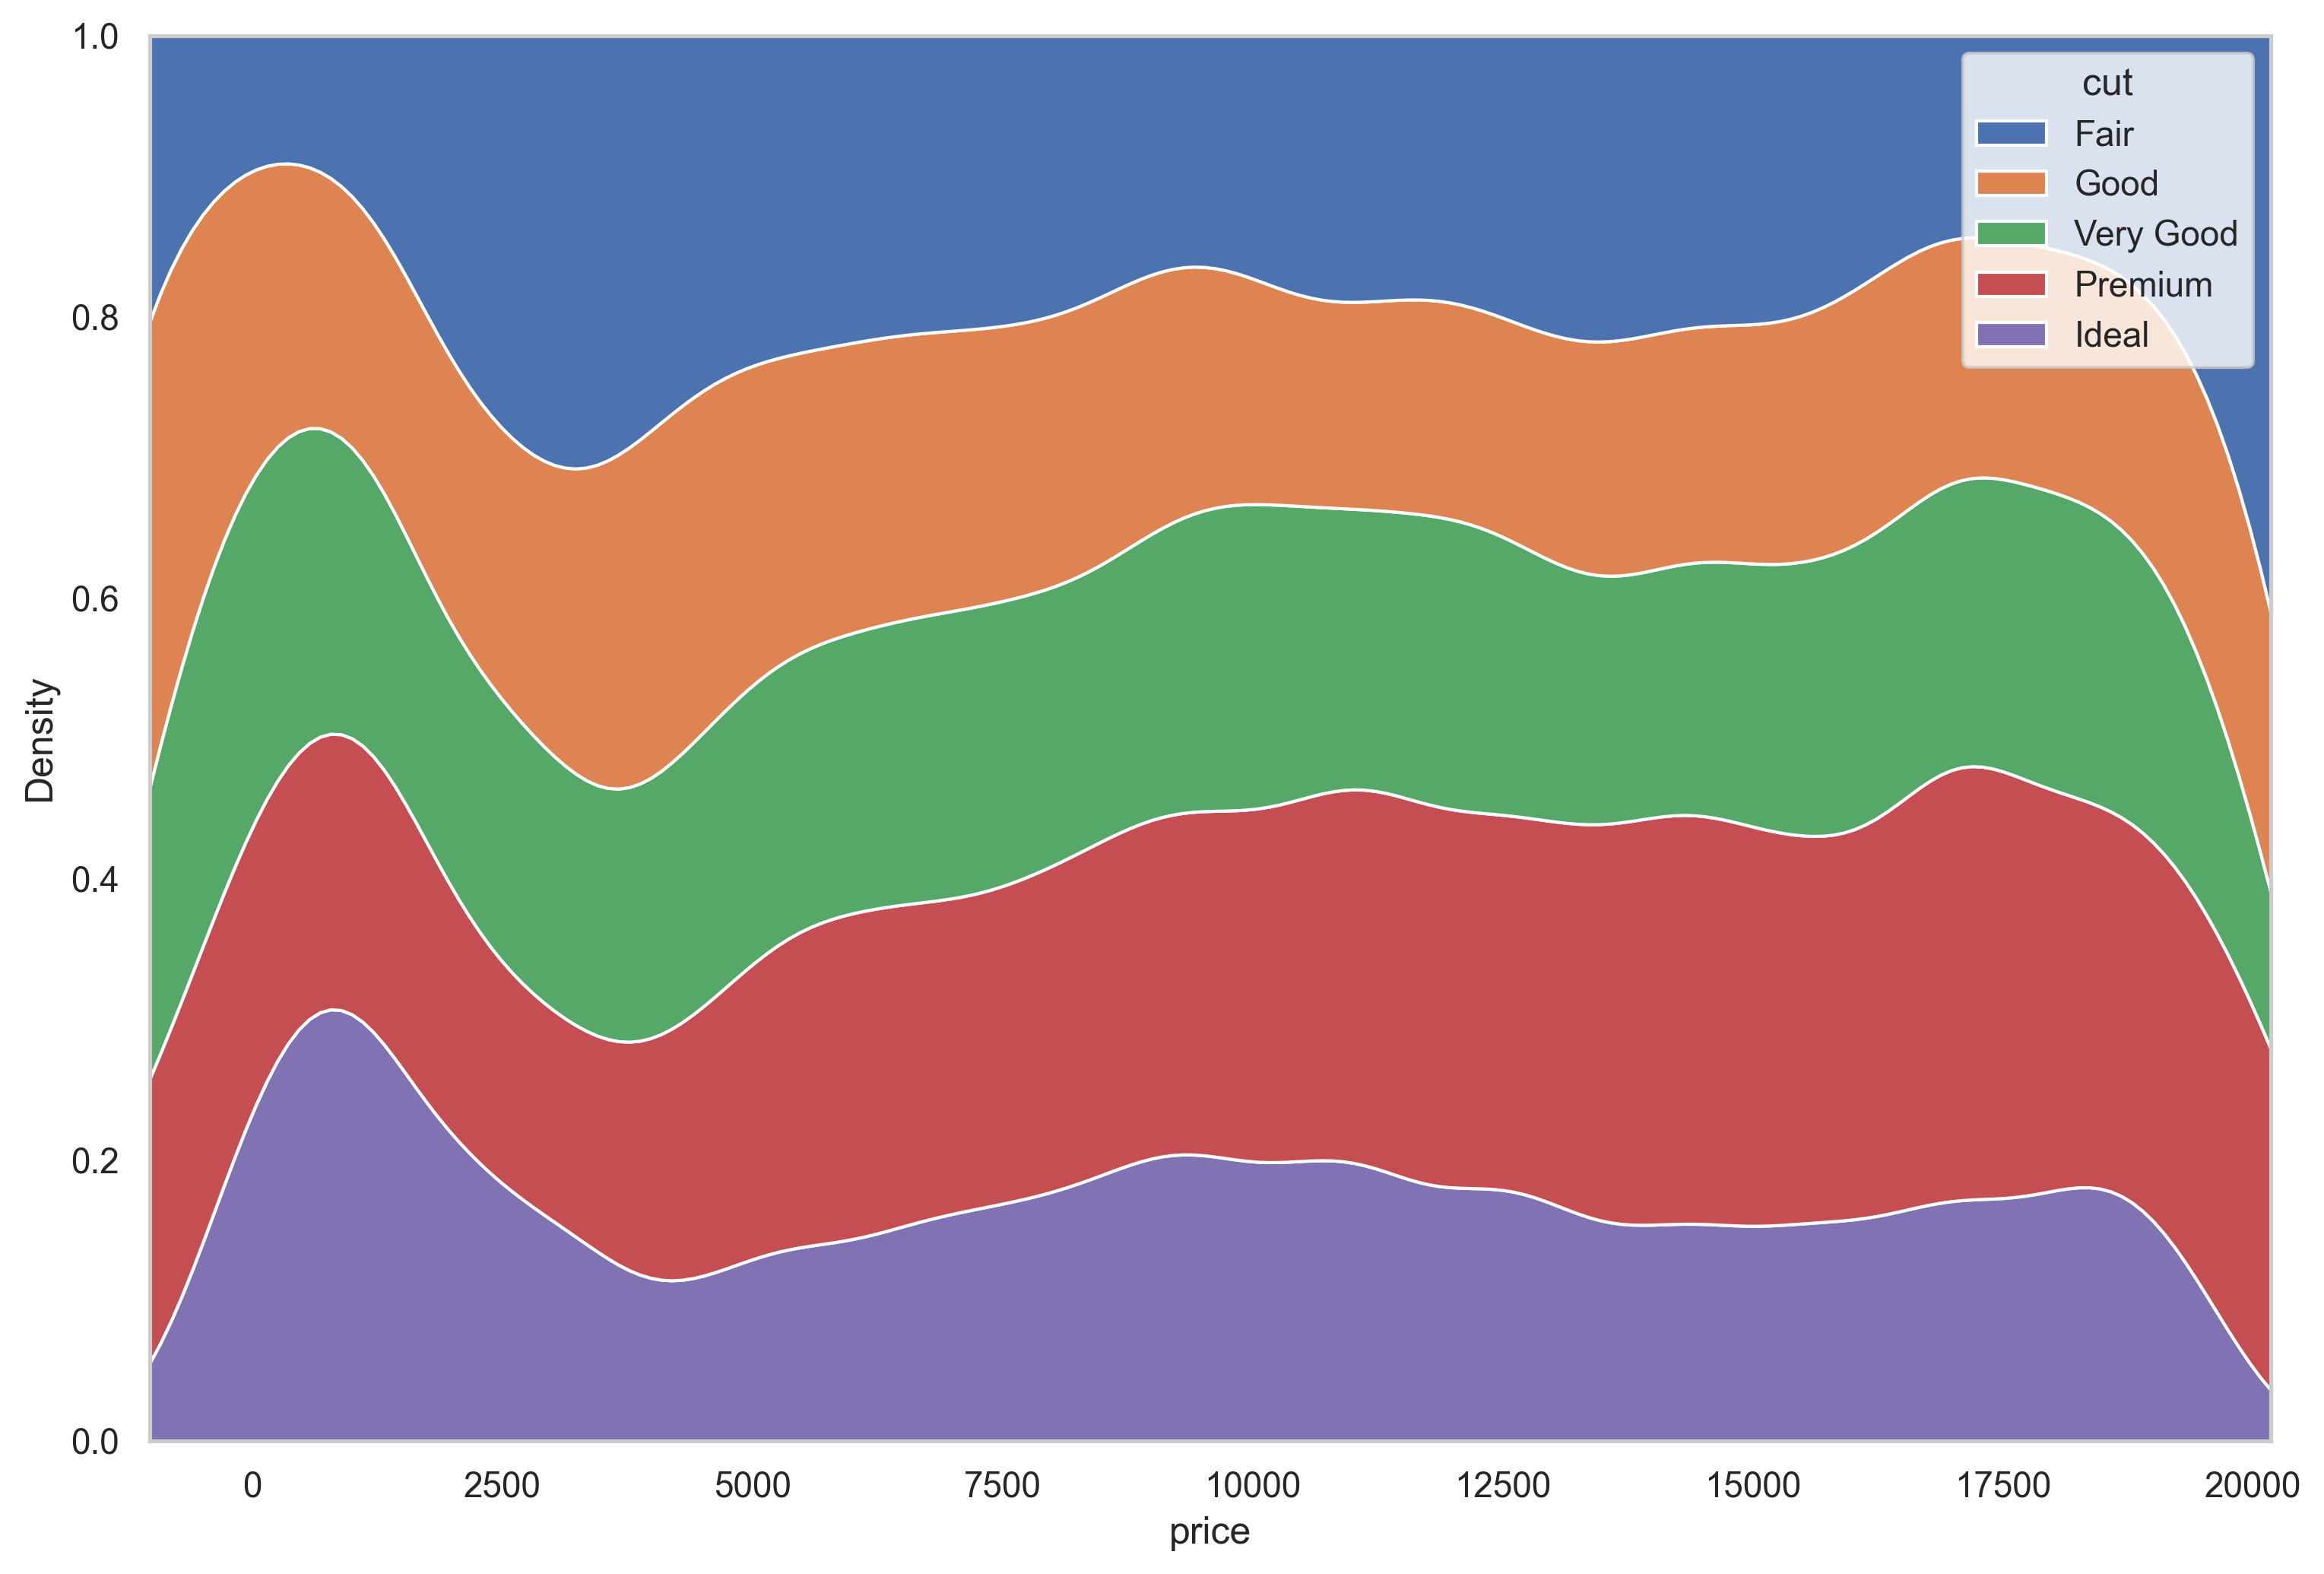

In [11]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import diamonds # dataset

# set seaborn whitegrid theme
sns.set_theme(style="whitegrid")

# stacked density plot
sns.kdeplot(data=diamonds, x="price", hue="cut", common_norm=False, multiple="fill", alpha=1)

# show the graph
plt.show()

## More palettes with PyPalettes

Thanks to the [pypalettes](/color-palette-finder) library, it's very easy to **customise the colormap** with superb palettes. All you have to do is use the `palette` argument to the seaborn function and pass it a **list of colours**, which we've loaded via the `get_hex()` function in pypalettes.

You can find the palette of your dreams on the [dedicated page](/color-palette-finder)


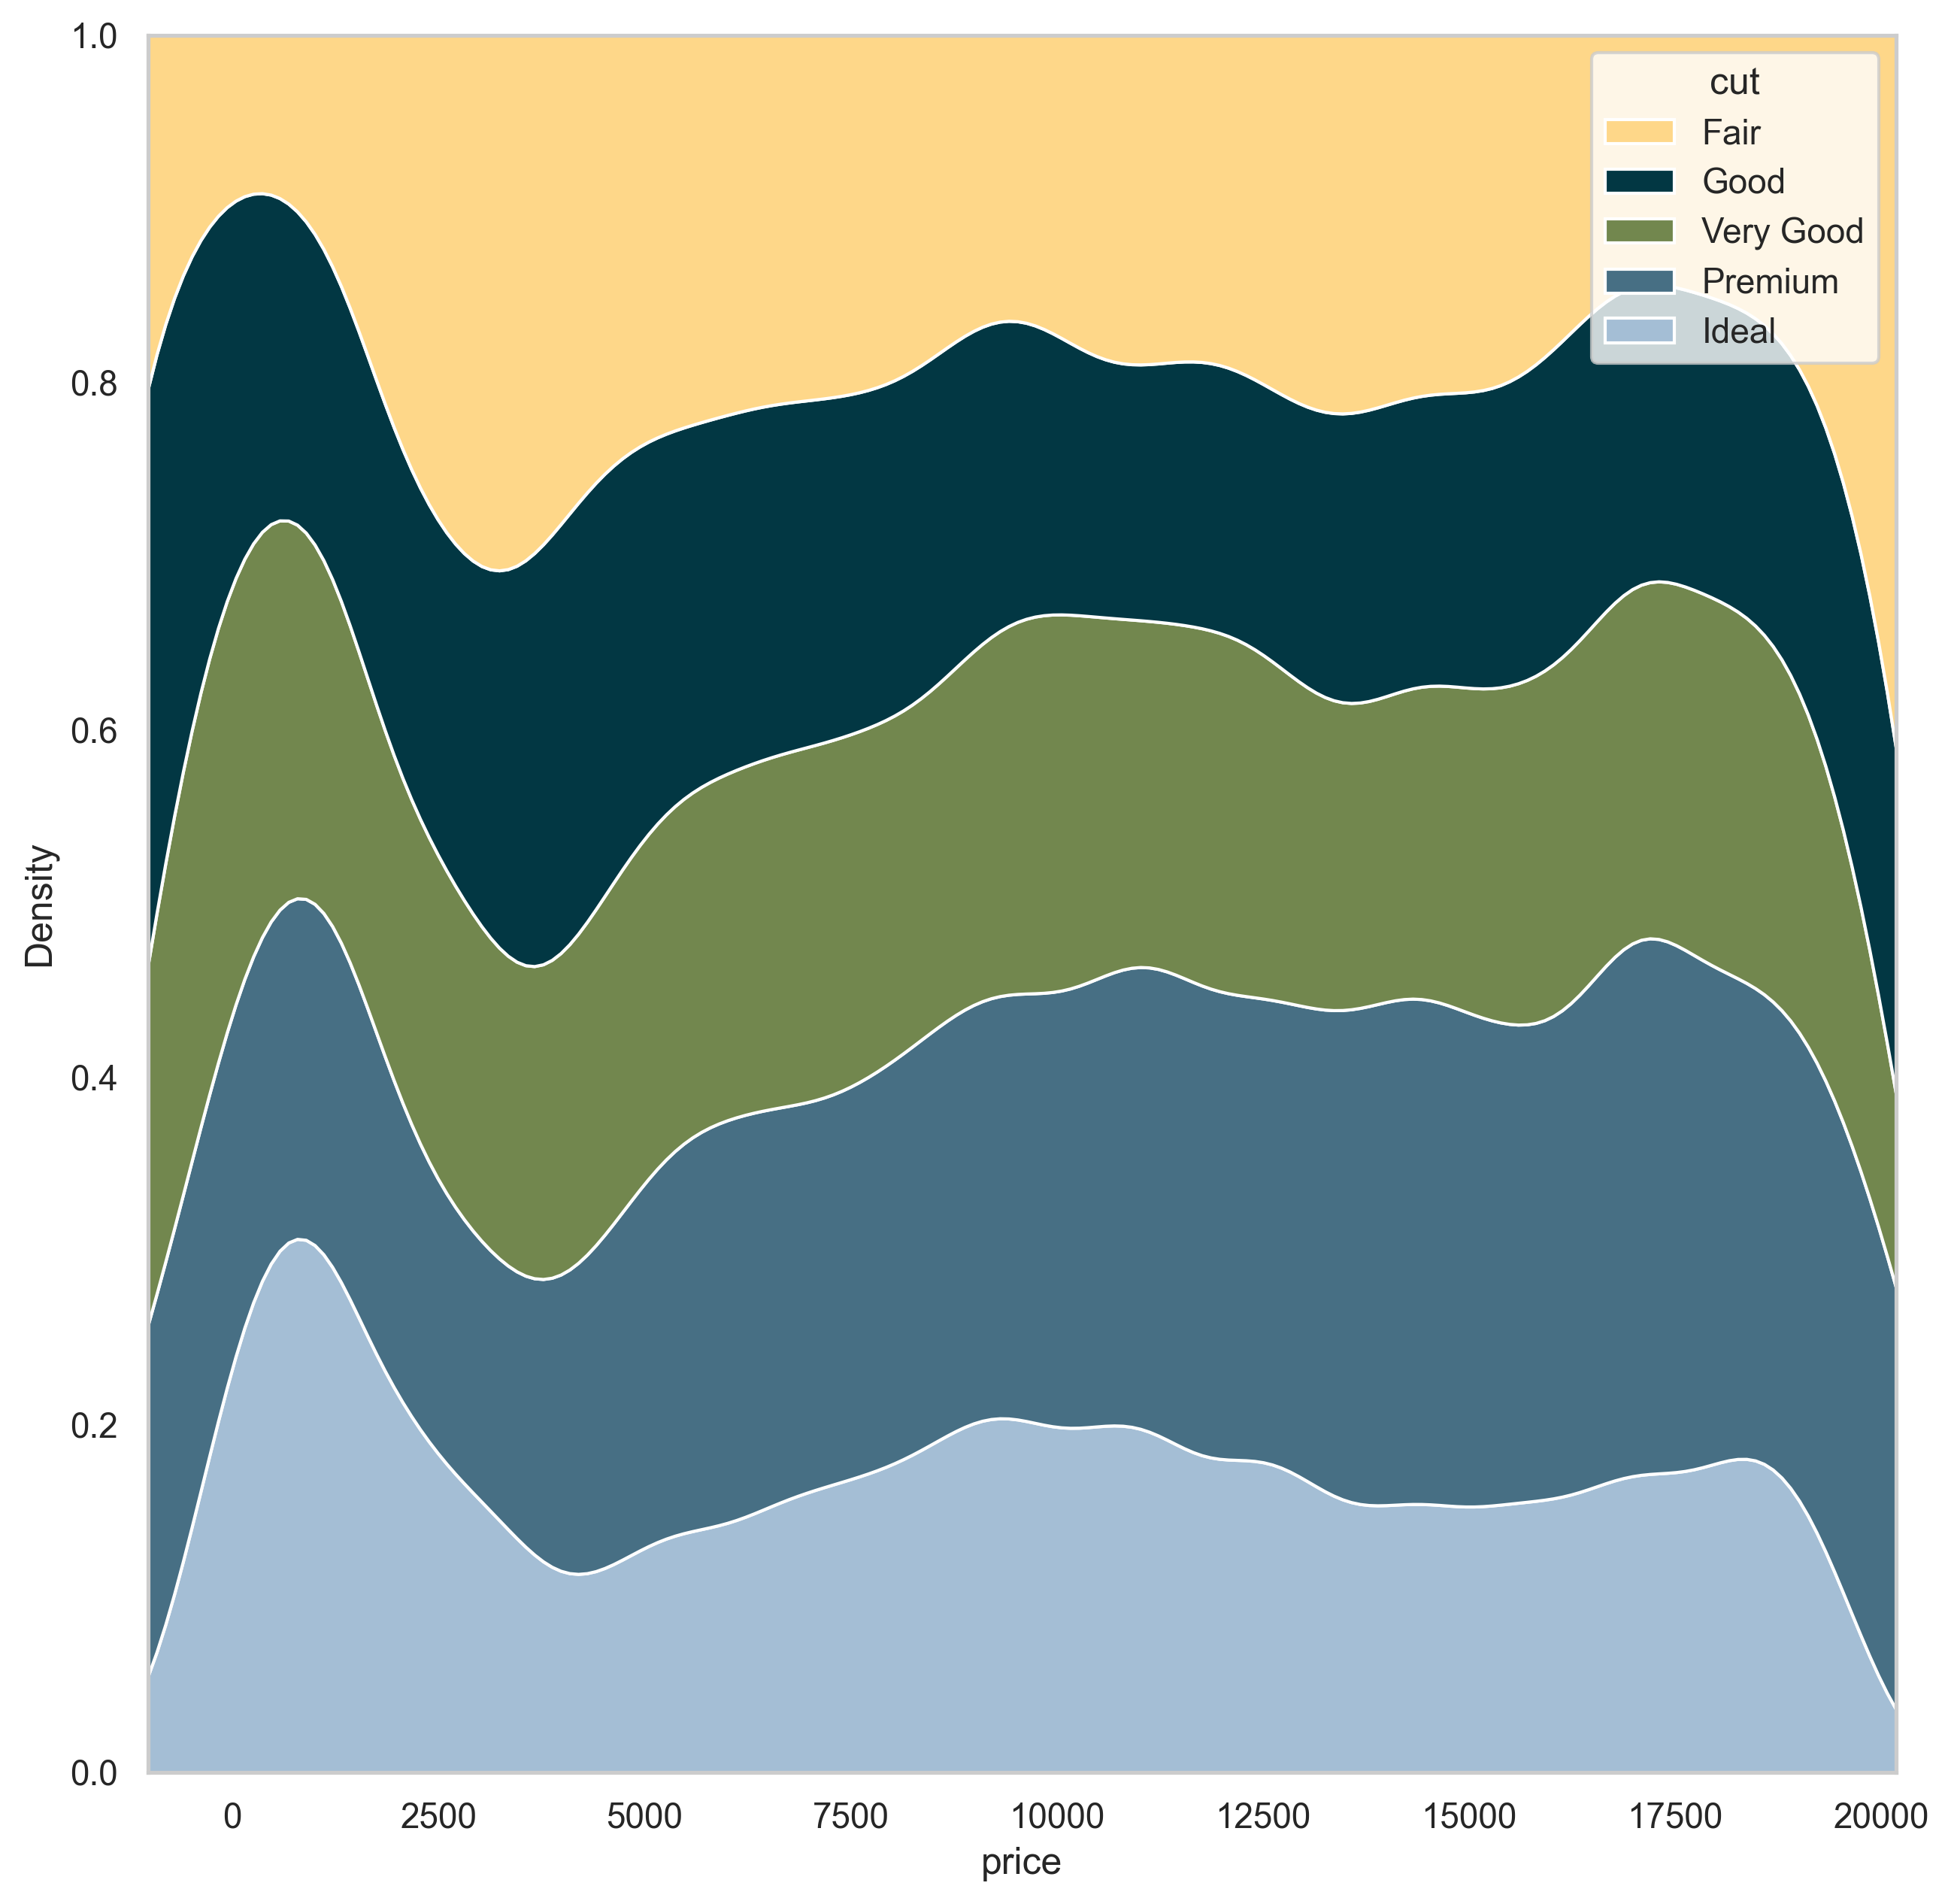

In [14]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import diamonds # dataset
from pypalettes import get_hex

plt.rcParams["figure.dpi"] = 300

# set seaborn whitegrid theme
sns.set_theme(style="whitegrid")

palette = get_hex('Acadia', keep_first_n=5)

# stacked density plot
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(data=diamonds, x="price", hue="cut", common_norm=False, multiple="fill", alpha=1, palette=palette, ax=ax)

# show the graph
plt.show()